### 1. Scala's real-world project repository data

With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available.

We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:

    1. pulls_2011-2013.csv contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
    2. pulls_2014-2018.csv contains identical information, and spans from 2014 up to 2018.
    3. pull_files.csv contains the files that were modified by each pull request.


In [6]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv("pulls_2011-2013.csv")
pulls_two = pd.read_csv("pulls_2014-2018.csv")
pull_files = pd.read_csv("pull_files.csv") 

In [42]:
pulls_one.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [9]:
pulls_two.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [10]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [12]:
print(pulls_one.shape)
print(pulls_two.shape)
print(pull_files.shape)

(3296, 3)
(2904, 3)
(85588, 2)


The append command combines the dataset in memory, known as the master dataset, with a
dataset on disk, known as the using dataset. Typically, a user would implement the append
command when they would like to add observations to an existing dataset with the same or
similar variables.

In [18]:
pulls = pd.concat([pulls_one, pulls_two])

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

In [19]:
pulls.shape

(6200, 3)

### Merging the DataFrames

In [21]:
# Merge pulls and pull_files on the pid column. Assign the result to the data variable.
data = pulls.merge(pull_files)
data.shape

(85588, 4)

In [22]:
data.head(20)

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31T23:10:55Z,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31T23:10:55Z,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31T23:10:55Z,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31T23:10:55Z,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31T16:55:47Z,src/library/scala/collection/mutable/ArrayOps....
5,11153894,Ichoran,2013-12-31T02:41:13Z,src/library/scala/collection/immutable/Numeric...
6,11153894,Ichoran,2013-12-31T02:41:13Z,test/junit/scala/collection/NumericRangeTest.s...
7,11151917,rklaehn,2013-12-30T23:45:47Z,src/library/scala/collection/immutable/HashMap...
8,11151917,rklaehn,2013-12-30T23:45:47Z,src/library/scala/collection/immutable/HashSet...
9,11151917,rklaehn,2013-12-30T23:45:47Z,test/files/run/t6196.scala


<AxesSubplot:xlabel='month,year'>

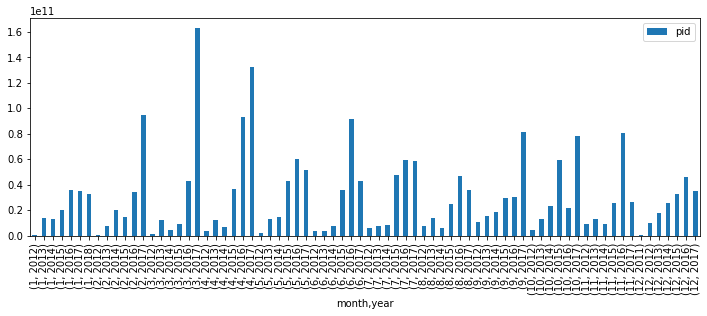

In [35]:
# Required for matplotlib
%matplotlib inline

data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year

# Group by the month and year and count the pull requests
counts = data.groupby(['month', 'year']).sum()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

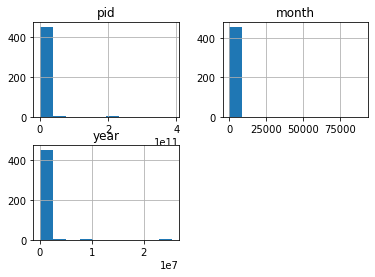

In [36]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby('user').sum()

# Plot the histogram
by_user.hist()

### What files were changed in the last ten pull requests

In [51]:
# Identify the last 10 pull requests
last_10 = pulls.sort_values(by ='date').tail(10)

# Join the two data sets
joined_pr = pull_files.merge(last_10, on='pid')

# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## Who made the most pull requests to a given file?

In [73]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()

# Print the top 3 developers
author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


### Who made the last ten pull requests on a given file ?

In [97]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10  = set(joined_pr.sort_values(by = 'date')['user'].tail(10))

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

### The pull requests of two special developers

<AxesSubplot:xlabel='date'>

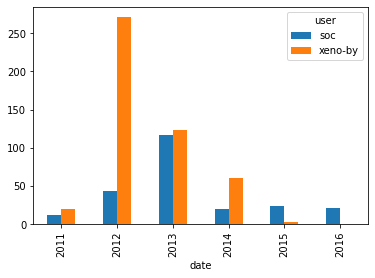

In [103]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], pd.DatetimeIndex(by_author['date']).year]).agg({'pid': 'count'}).reset_index()


# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar')

In [ ]:
### Visualizing the contributions of each developer